****************************************************************************
* @file: Robots.py
* @project: ROBOFEI-HT - FEI 😛
* @author: Vinicius Nicassio Ferreira
* @version: V0.0.1
* @created: 23/10/2017
* @e-mail: vinicius.nicassio@gmail.com
* @brief: Class Robots
****************************************************************************

In [1]:
#ini-iPython

# Executando no diretório principal

In [2]:
import os
os.chdir('../../') #Executando na pasta Visual_Memory
os.system("cd Workbench/ && ./zerar.sh && cd ..")
os.system("cd Workbench/iPython/ && ./convertendo.sh && cd ../../")
import sys
sys.path.append('./include')
sys.path.append('./src')
sys.path.append('./Workbench/iPython')
#end-iPython

---- Imports ----

In [3]:
# Libraries to be used.
import sys
#des-iPython sys.path.append("../include")
#des-iPython sys.path.append("../src")

In [4]:
# The standard libraries used in the visual memory system.


In [5]:
# Used class developed by RoboFEI-HT.
#ini-iPython - Usando Classe KalmanFilter como instanciação
os.system("sed -i '/@abstractmethod/d' ./Workbench/iPython/BasicThread.py")
os.system("sed -i '/__metaclass__/d' ./Workbench/iPython/BasicThread.py")
#end-iPython
from BasicThread import * # Responsible for implementing the methods and variables responsible for managing the thread.
sym.init_printing() #debug-iPython

# Class to Robots
Class responsible for performing robots tracking.
doxygen-iPython

In [6]:
#des-iPython class Robots(BasicThread):
#ini-tab -> Iniciando código classe

---- Variables ----

# listfunction
.
doxygen-iPython

In [7]:
__listfunction = None #self-iPython __listfunction

# robotnumber
.
doxygen-iPython

In [8]:
__robotnumber = None #self-iPython __robotnumber

# posdata
.
doxygen-iPython

In [9]:
__posdata = None #self-iPython __posdata

# contreset
.
doxygen-iPython

In [9]:
__contreset = 0 #self-iPython __contreset

# __lastposdata
.
doxygen-iPython

In [10]:
__lastposdata = None #self-iPython __lastposdata

# timenumber
.
doxygen-iPython

In [11]:
timenumber = 0 #self-iPython timenumber

# weight
.
doxygen-iPython

In [12]:
weight = 0 #self-iPython weight

In [13]:
#ini-iPython

# ------- Lista de funções -------

#self-iPython reset
#self-iPython __predictVector
#self-iPython predictThread
#self-iPython __updateVector
#self-iPython updateThread
#self-iPython run
#self-iPython end
#self-iPython calculatesDistance
#self-iPython __lt__
#self-iPython testReset

#end-iPython - Fim listas

# reset
.
doxygen-iPython

In [14]:
#eself-iPython reset
#edes-iPython def reset(self):
def reset( ):
    global timenumber, self #debug-iPython
    __listfunction = [ ]
    
    while not self._threadPaused():
        pass
    
    #edes-iPython super(Robots, self)._reset( )
    self._reset( )
    
    self._A = self._A[:-2,:-2]
    self._B = self._B[:-2,:]
    self._R = self._R[:-2,:-2]
    self._C = self._C[:,:-2]
    
    self._predictedstate["x"] = self._predictedstate["x"][:-2,:]
    self._predictedstate["covariance"] = self._predictedstate["covariance"][:-2,:-2]

    if timenumber == 0:
        return
    elif timenumber < 0:
        print "Adversario:", "VISUAL_MEMORY_OP_"+ str(-timenumber).zfill(2) #debug-iPython
        self._bkb.write_float("VISUAL_MEMORY_OP_"+ str(-timenumber).zfill(2) +"_X", 0)
        self._bkb.write_float("VISUAL_MEMORY_OP_"+ str(-timenumber).zfill(2) +"_Y", 0)
        self._bkb.write_float("VISUAL_MEMORY_OP_"+ str(-timenumber).zfill(2) +"_MAX_VEL", 0)
        self._bkb.write_float("VISUAL_MEMORY_OP_"+ str(-timenumber).zfill(2) +"_LOC", 0)
    else:
        print "Aliado:", "VISUAL_MEMORY_AL_"+ str(timenumber).zfill(2) #debug-iPython
        self._bkb.write_float("VISUAL_MEMORY_AL_"+ str(timenumber).zfill(2) +"_X", 0)
        self._bkb.write_float("VISUAL_MEMORY_AL_"+ str(timenumber).zfill(2) +"_Y", 0)
        self._bkb.write_float("VISUAL_MEMORY_AL_"+ str(timenumber).zfill(2) +"_MAX_VEL", 0)
        self._bkb.write_float("VISUAL_MEMORY_AL_"+ str(timenumber).zfill(2) +"_LOC", 0)
    timenumber = 0  #self-iPython reset

In [15]:
#ini-iPython

## Teste reset

KALMAN FILTER - ROBOTS section not found!
Adversario: VISUAL_MEMORY_OP_02


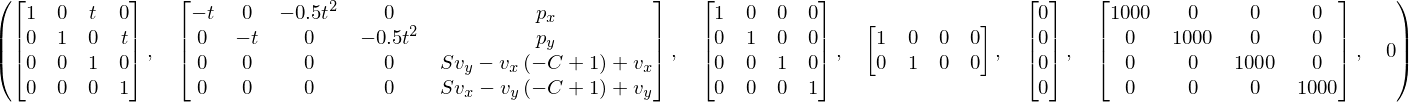

In [16]:
timenumber = -2
vrx, vry, arx, ary = sym.symbols("vr_x vr_y ar_x ar_y")
s = Speeds( ) #debug-iPython
self = BasicThread(None, s, "Robots")
reset( )
self._A, self._B, self._R, self._C, self._predictedstate["x"], self._predictedstate["covariance"], timenumber

In [17]:
del self
del s
#end-iPython

# Constructor Class
doxygen-iPython

In [18]:
#ini-iPython
class argumentos:
    numberrobots = 3
    executionperiod = 2000
    debug = False
    savedata = True
a = argumentos()
#end-iPython
s = Speeds( ) #debug-iPython
pos = [0, 0] #debug-iPython
n = 2 #debug-iPython
#des-iPython def __init__(self, a, s, pos, n):
#ini-tab -> Criando construtor
# Instantiating constructor for inherited class.
#edes-iPython super(Robots, self).__init__(a, s, "Robots")
self = BasicThread(a, s, "Robots")

timenumber = n

__posdata = pos

# Creating characteristic variables for Robots and reading.
self._parameters.update({
    "precision": 0.6
})
self._parameters = self._conf.readVariables(self._parameters)

reset( )

#des-iPython self.start( )

KALMAN FILTER - ROBOTS section not found!
Aliado: VISUAL_MEMORY_AL_02


In [19]:
#end-tab -> Finalizando construtor

In [20]:
#ini-iPython

## Teste construtor

{'linear_acceleration': False, 'precision': 0.6, 'vision_error': 0.1}


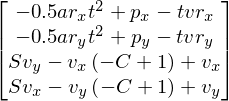

In [21]:
self._end( )
print self._parameters

vrx, vry, arx, ary = sym.symbols("vr_x vr_y ar_x ar_y")

__u = sym.Matrix([
    [vrx],
    [vry],
    [arx],
    [ary],
    [1],
])

self._B*__u
#end-iPython

# __predictVector
.
doxygen-iPython

In [22]:
#eself-iPython __predictVector
#edes-iPython def __predictVector(self, vector):
def __predictVector(vector):
    tnow, movements = vector    
    print "Antes da Predição" #debug-iPython
    print "tnow:", tnow #debug-iPython
    print self._state["x"] #debug-iPython
    print self._state["covariance"] #debug-iPython
    print "\n" #debug-iPython
    raw_input("Continue...") #debug-iPython
    print "\n" #debug-iPython
    #edes-iPython super(Robots, self)._predict(tnow, movements)
    self._predict(tnow, movements)
    print "Depois da Predição" #debug-iPython
    print self._state["x"] #debug-iPython
    print self._state["covariance"] #debug-iPython
    print "\n" #debug-iPython
    raw_input("Continue...") #debug-iPython
    print "\n" #debug-iPython
    
    print self.getName(), "tnow:", tnow #debug-iPython
    if tnow == None and self._args.savedata == True:
        try:
            a = np.load("./Data/" + self.getName() + "-Robots.npy")
            a = np.concatenate((a,
                [[
                    self._state["time"],
                    [float(i) for i in self._state["x"][:,0]],
                    [self._state["covariance"][i,i] for i in xrange(self._state["covariance"].shape[0])],
                    [float(i) for i in self._state["covariance"][:,0]],
                    timenumber,
                ]]),
                axis=0
            )
        except IOError:
            a = [[
                self._state["time"],
                [float(i) for i in self._state["x"][:,0]],
                [self._state["covariance"][i,i] for i in xrange(self._state["covariance"].shape[0])],
                [float(i) for i in self._state["covariance"][:,0]],
                timenumber,
            ]]
        np.save("./Data/" + self.getName() + "-Robots", a)
    if tnow == None and timenumber != 0:
        if self._predictedstate["covariance"][0, 0] > self._parameters['vision_error'] or self._predictedstate["covariance"][1, 1] > self._parameters['vision_error']:
            if timenumber > 0:
                self._bkb.write_float(
                    "VISUAL_MEMORY_AL_" + str(int(timenumber)).zfill(2) + "_LOC",
                    0
                )
            else:
                self._bkb.write_float(
                    "VISUAL_MEMORY_OP_" + str(-int(timenumber)).zfill(2) + "_LOC",
                    0
                )
        
        elif timenumber > 0:
            self._bkb.write_float(
                "VISUAL_MEMORY_AL_" + str(int(timenumber)).zfill(2) + "_X",
                self._state["x"][0, 0]
            )
            self._bkb.write_float(
                "VISUAL_MEMORY_AL_" + str(int(timenumber)).zfill(2) + "_Y",
                self._state["x"][1, 0]
            )
            
#             if sym.sqrt(self._state["x"][2, 0]**2 + self._state["x"][3, 0]**2) > self._bkb.read_float("VISUAL_MEMORY_AL_" + str(int(timenumber)).zfill(2) + "_MAX_VEL"):
            self._bkb.write_float(
                "VISUAL_MEMORY_AL_" + str(int(timenumber)).zfill(2) + "_MAX_VEL",
                sym.sqrt(self._state["x"][2, 0]**2 + self._state["x"][3, 0]**2)
            )
            
            self._bkb.write_float(
                "VISUAL_MEMORY_AL_" + str(int(timenumber)).zfill(2) + "_LOC",
                1
            )
        else:
            self._bkb.write_float(
                "VISUAL_MEMORY_OP_" + str(-int(timenumber)).zfill(2) + "_X",
                self._state["x"][0, 0]
            )
            self._bkb.write_float(
                "VISUAL_MEMORY_OP_" + str(-int(timenumber)).zfill(2) + "_Y",
                self._state["x"][1, 0]
            )
            
#             if sym.sqrt(self._state["x"][2, 0]**2 + self._state["x"][3, 0]**2) > self._bkb.read_float("VISUAL_MEMORY_OP_" + str(-int(timenumber)).zfill(2) + "_MAX_VEL"):
            self._bkb.write_float(
                "VISUAL_MEMORY_OP_" + str(-int(timenumber)).zfill(2) + "_MAX_VEL",
                sym.sqrt(self._state["x"][2, 0]**2 + self._state["x"][3, 0]**2)
            )
            
            self._bkb.write_float(
                "VISUAL_MEMORY_OP_" + str(-int(timenumber)).zfill(2) + "_LOC",
                1
            ) #self-iPython __predictVector

In [23]:
#ini-iPython

## Teste __predictVector

In [24]:
#end-iPython

# predictThread
.
doxygen-iPython

In [25]:
#eself-iPython predictThread
#edes-iPython def predictThread(self, tnow = None, movements = None):
def predictThread(tnow = None, movements = None):
    __listfunction.append([__predictVector, [tnow, movements]])
    self._resume( ) #self-iPython predictThread

In [26]:
#ini-iPython

## Teste predictThread

In [27]:
predictThread(1.0, 1)
#end-iPython

AttributeError: 'NoneType' object has no attribute 'append'

# updateVector
.
doxygen-iPython

In [ ]:
#eself-iPython __updateVector
#edes-iPython def __updateVector(self, data):
def __updateVector(data):
    print "Antes da atualização" #debug-iPython
    print self._state["x"] #debug-iPython
    print self._state["covariance"] #debug-iPython
    raw_input() #debug-iPython
    #edes-iPython super(Robots, self)._update(data) #self-iPython __updateVector
    self._update(data)
    print "Depois da atualização" #debug-iPython
    print self._state["x"] #debug-iPython
    print self._state["covariance"] #debug-iPython
    raw_input() #debug-iPython

# updateThread
.
doxygen-iPython

In [ ]:
#eself-iPython updateThread
#edes-iPython def updateThread(self, data):
def updateThread(data):
    __listfunction.append([__updateVector, data])
    self._resume( ) #self-iPython updateThread

In [ ]:
#ini-iPython

## Teste predictThread

In [ ]:
predictThread(1.0, 1)
#end-iPython

# run
.
doxygen-iPython

In [ ]:
#eself-iPython run
#edes-iPython def run(self):
def run( ):
    global self #debug-iPython
    #edes-iPython self._running = True
    self.running = True
    #edes-iPython while self._running:
    while self.running:
        #edes-iPython with self._pausethread:
        with self.pausethread:
            while __listfunction != []:
                func, data = __listfunction.pop(0)
                func(data)
        #edes-iPython self._pause( ) #self-iPython run
        self.pause( )

In [ ]:
#ini-iPython

## Teste run

In [ ]:
self = BasicThread(None, s, "Robots")
self._reset()
self.run = run
self.start( )

data = {
    "target": 1,
    "pos": [1, 1],
    "time": 1.0,
    "movement": 1
}
__listfunction = [ ]

updateThread(data)

# time.sleep(1)
print "listfunction:", __listfunction
self._predictedstate

In [ ]:
print self._predictedstate
time.sleep(1)
self._finalize( )
print self.running
#end-iPython

# end
.
doxygen-iPython

In [ ]:
#eself-iPython end
#edes-iPython def end(self):
def end( ):
    __listfunction = [ ]
    self._finalize( )
    #edes-iPython super(Robots, self)._end( ) #self-iPython end
    self._end( ) #self-iPython end

In [ ]:
#ini-iPython

## Teste end

In [ ]:
end( )
#end-iPython

# calculatesDistance
.
doxygen-iPython

In [ ]:
#eself-iPython calculatesDistance
#edes-iPython def calculatesDistance(self):
def calculatesDistance( ):
    global __lastposdata, __posdata, weight #debug-iPython
    print "Last:", __lastposdata #debug-iPython
    print "Atual:", __posdata #debug-iPython    
    if __lastposdata == __posdata[:2]:
        print "Já calulado" #debug-iPython
        raw_input("...") #debug-iPython
        return
    
    print "Calculando" #debug-iPython
    self._predict(__posdata[2], 0)    
    __lastposdata = copy(__posdata[:2])
    
      
    #ini-iPython
    print "Valor Comparação", sym.Matrix(__posdata[:2])
    print "Estado:", self._predictedstate["x"][:2,:2]
    print "Covariancia", self._predictedstate["covariance"][:2,:2]
    temp = sym.Matrix(__posdata[:2]) - self._predictedstate["x"][:2,:2]
    temp = 1./(1+(temp[0]**2 + temp[1]**2)**0.5)
    print temp
    raw_input("...")
    #end-iPython
    
    weight = sym.Matrix(__posdata[:2]) - self._predictedstate["x"][:2,:2]
    weight = 1./(1+(weight[0]**2 + weight[1]**2)**0.5) #self-iPython calculatesDistance

In [ ]:
#ini-iPython

## Teste calculatesDistance

In [ ]:
__posdata = [1, 1]

self._state["x"][:2,:2] = [1, 2]
self._state["x"][:2,:2]
self._state["covariance"][:2,:2] = [[1, 0], [0, 1]]

calculatesDistance( )
print weight
#end-iPython

# __lt__
.
doxygen-iPython

In [ ]:
#eself-iPython __lt__
#eself-iPython weight
#eself-iPython calculatesDistance
#edes-iPython def __lt__(self, other):
def __lt__(other):
    self.calculatesDistance( )
    other.calculatesDistance( )
    return self.weight < other.weight #self-iPython __lt__
    #self-iPython weight
    #self-iPython calculatesDistance

In [ ]:
#ini-iPython

## Teste __lt__

In [ ]:

#end-iPython

# testReset
doxygen-iPython

In [ ]:
#eself-iPython testReset
#edes-iPython def testReset(self):
def testReset( ):
    print "\n" #debug-iPython
    print "Erro:", self._state["covariance"][0,0] + self._state["covariance"][1,1] #debug-iPython
    print "Valor max:", self._parameters["vision_error"] #debug-iPython
    print "if:", self._state["covariance"][0,0] + self._state["covariance"][1,1] > 3*self._parameters["vision_error"] #debug-iPython
    if self._state["covariance"][0,0] + self._state["covariance"][1,1] > 3*self._parameters["vision_error"]:
        __contreset += 1
    else:
        __contreset = 0
        
    if __contreset == 20:
        reset()
        __contreset = 0
        print "Resetando" #debug-iPython
        return True
    else:
        return False #self-iPython testReset

In [ ]:
#ini-iPython

## Teste testReset

In [ ]:

#end-iPython

In [ ]:
#end-tab -> Finalizando classe

In [ ]:
#ini-iPython

# nova_variavel
.
doxygen-iPython

In [ ]:
nova_variavel = None #self-iPython nova_variavel

# nova_funcao
.
doxygen-iPython

In [ ]:
# eself-iPython nova_funcao
# edes-iPython def nova_funcao(self, variaveis_funcao):
def nova_funcao(variaveis_funcao):
    pass # self-iPython nova_funcao

In [ ]:
#ini-iPython

## Teste nova_funcao

In [ ]:

#end-iPython

In [1]:
#end-iPython